# Universal Binary Principle (UBP) Repository Workbench
Euan Craig, New Zealand, 2025
[info@digitaleuan.com](mailto:info@digitaleuan.com)

Integrated computational environment for the UBP repository [https://github.com/DigitalEuan/ubp-framework](https://github.com/DigitalEuan/ubp-framework).

## Understanding the Dynamic Module Loading System

This notebook is set up to dynamically discover and load Python modules directly from the `python` directory (and its subdirectories) within your cloned `ubp-framework` repository. This means you can add new `.py` files to the `python` folder in your repository, pull the changes, re-run the module loading cells in this notebook, and your new modules will become available for use without needing to manually add import statements for each one.

### How it Works:

1.  **Module Discovery:** The `find_modules()` function scans the `python` directory and its subdirectories for all Python files (excluding `__init__.py`). It generates a list of potential module names based on their path relative to the `python` directory (e.g., `crv/analysis.py` becomes the module name `crv.analysis`).
2.  **Dynamic Loading:** The code iterates through the discovered module paths and uses Python's `importlib` to dynamically load each file as a module into the current notebook environment (`sys.modules`).
3.  **Access Layer (RepositoryWorkbench):** The `RepositoryWorkbench` class is instantiated with the dictionary of successfully loaded modules. This object acts as a central point to manage and access the loaded modules.
4.  **Helper Functions:** Simple helper functions (`list_available_modules()`, `list_module_contents()`, `get_repo_module()`) are provided for convenient interaction with the `workbench`.

### How to Use Dynamically Loaded Modules:

After running the module discovery and loading cells (Steps 2-5 in this notebook), the `workbench` object and the helper functions will be available.

*   **List available modules:** Use `list_available_modules()` to see the names of all modules that were successfully loaded from your repository.
*   **List module contents:** Use `list_module_contents('module_name')` (replacing `'module_name'` with the actual name, e.g., `'crv.analysis'` or `'my_test_module'`) to see the callable functions and classes within that module.
*   **Access a module:** Use `get_repo_module('module_name')` to get a direct reference to the loaded module object. You can then call its functions or instantiate its classes just like a normally imported module (e.g., `my_module = get_repo_module('my_module'); my_module.my_function()`).

**Example:**


```python
Example: Accessing a dynamically loaded module (replace 'my_test_module' with an actual loaded module name)
List available modules

list_available_modules()
List contents of a specific module

list_module_contents('my_test_module')
Get a module and use its contents

my_module = get_repo_module('my_test_module') if my_module:

# Assuming the module has a function called 'some_function'
# result = my_module.some_function(some_argument)
# print(result)
print("\nSuccessfully retrieved my_test_module. You can now access its functions and classes.")

else: print("\nModule not found or failed to load.")


In [91]:
# If using Colab, clone your repo and cd into it. Otherwise, ensure you're in the repo root.
!git clone https://github.com/DigitalEuan/ubp-framework
%cd ubp-framework

Cloning into 'ubp-framework'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 174 (delta 62), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (174/174), 100.45 KiB | 1.07 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/ubp-framework/ubp-framework/ubp-framework/ubp-framework/ubp-framework/ubp-framework


In [92]:
# @title
# Install pandas and numpy if needed
try:
    import pandas as pd
    import numpy as np
except ImportError:
    !pip install pandas numpy
    import pandas as pd
    import numpy as np

In [75]:
# @title
# Set up Python path so modules can be imported
import sys
sys.path.append('.')

## 1. Load CRV Catalog and Loader

In [93]:
# @title
import sys
sys.path.append('.')
from python.crv.loader import CRVCatalog
DATA_PATH = "data/crv_catalog.csv"
catalog = CRVCatalog(DATA_PATH)
print(f"Loaded {len(catalog.df)} CRV nodes.")

Loaded 194 CRV nodes.


## 2. Load HGR Engine and Geometric Generators

In [94]:
# @title
from python.hgr.core import HGR
from python.hgr.generators import generate_sphere_points, generate_noisy_tetrahedron, generate_torus_points

## 3. Display and Analyze CRV Data

In [95]:
catalog.df.head(10)  # Show first 10 CRV nodes

,Node_ID,Solid,Node_Type,Node_Index,Position_X,Position_Y,Position_Z,CRV_Name,CRV_Value,CRV_Symbol,CRV_Type,Is_Known_Constant,Realm,Wavelength_nm,Frequency_Hz,Description
0,1,tetrahedron,vertex,0,0.347026,0.250000,0.850000,pi,3.141593,pi,primary_constant,True,quantum,300.0,3.142000e+12,Primary mathematical constant pi
1,2,tetrahedron,vertex,1,0.807638,0.789801,0.810199,pi_div_phi,1.941611,pi/phi,transcendental_compound,True,quantum,300.0,1.942000e+12,Pi divided by golden ratio
2,3,tetrahedron,vertex,2,0.763309,0.306642,0.293358,e,2.718282,e,primary_constant,True,quantum,300.0,2.718000e+12,Primary mathematical constant e
3,4,tetrahedron,vertex,3,0.255948,0.850000,0.250000,tau,6.283185,tau,primary_constant,True,quantum,300.0,6.283000e+12,Primary mathematical constant tau
4,5,tetrahedron,edge,0,0.363309,0.506642,0.493358,e,2.718282,e,primary_constant,True,quantum,300.0,2.718000e+12,Primary mathematical constant e
5,6,tetrahedron,edge,1,0.724161,0.607261,0.392739,e_div_phi,1.679991,e/phi,transcendental_compound,True,quantum,300.0,1.680000e+12,Euler number divided by golden ratio
6,7,tetrahedron,edge,2,0.307638,0.389801,0.610199,pi_div_phi,1.941611,pi/phi,transcendental_compound,True,quantum,300.0,1.942000e+12,Pi divided by golden ratio
7,8,tetrahedron,edge,3,0.489369,0.668844,0.331156,tau_phi,19.565104,tau^phi,transcendental_compound,True,quantum,300.0,1.957000e+13,Tau raised to the power of golden ratio
8,9,tetrahedron,edge,4,0.677694,0.532631,0.467369,zeta_3,1.202057,ζ(3),number_theory_constant,True,quantum,300.0,1.202000e+12,Apéry's constant (zeta function at 3)
9,10,tetrahedron,edge,5,0.375723,0.320720,0.679280,catalan,0.915966,G,number_theory_constant,True,quantum,300.0,9.160000e+11,Catalan's constant


### Realm Distribution, Frequency, and CRV Statistics

In [79]:
# @title
from python.crv.analysis import realm_distribution, known_vs_new_constants, frequency_stats, crv_statistics

print('Node counts by realm:')
# Modified to work with DataFrame
print(catalog.df['Realm'].value_counts())

print('Known vs New constants:')
# Modified to work with DataFrame
print(catalog.df['Is_Known_Constant'].value_counts())

print('Frequency stats:')
# Modified to work with DataFrame
print(catalog.df['Frequency_Hz'].describe())

print('CRV value stats:')
# Modified to work with DataFrame
print(catalog.df['CRV_Value'].describe())

Node counts by realm:
Realm
cosmological       62
biological         62
gravitational      26
electromagnetic    26
quantum            14
cross_realm         4
Name: count, dtype: int64
Known vs New constants:
Is_Known_Constant
True     174
False     20
Name: count, dtype: int64
Frequency stats:
count    1.940000e+02
mean     5.655778e+19
std      7.875993e+20
min      5.051000e-42
25%      3.101000e-14
50%      6.931000e+10
75%      1.953250e+12
max      1.097000e+22
Name: Frequency_Hz, dtype: float64
CRV value stats:
count    1.940000e+02
mean     1.697418e+05
std      1.357533e+06
min      5.050784e-27
25%      1.633523e+00
50%      3.141593e+00
75%      2.056402e+01
max      1.097373e+07
Name: CRV_Value, dtype: float64


## 4. Generate New Geometric Data and Compute CRV/Stability
Use HGR engine and generators to create new forms and compute their resonance values.

In [96]:
# @title
# Generate a sphere (12 points)
sphere_pts = generate_sphere_points(12)
for idx, pt in enumerate(sphere_pts):
    crv_val = HGR.crv_from_geometry('sphere', pt)
    stability = HGR.calculate_stability(crv_val)
    print(f"Sphere point {idx}: CRV={crv_val:.3f}, Stability={stability:.3f}")

Sphere point 0: CRV=1.010, Stability=0.969
Sphere point 1: CRV=1.010, Stability=0.969
Sphere point 2: CRV=1.010, Stability=0.969
Sphere point 3: CRV=1.010, Stability=0.969
Sphere point 4: CRV=1.010, Stability=0.969
Sphere point 5: CRV=1.010, Stability=0.969
Sphere point 6: CRV=1.010, Stability=0.969
Sphere point 7: CRV=1.010, Stability=0.969
Sphere point 8: CRV=1.010, Stability=0.969
Sphere point 9: CRV=1.010, Stability=0.969
Sphere point 10: CRV=1.010, Stability=0.969
Sphere point 11: CRV=1.010, Stability=0.969


## 5. Visualization Example (CRV Distribution by Realm)

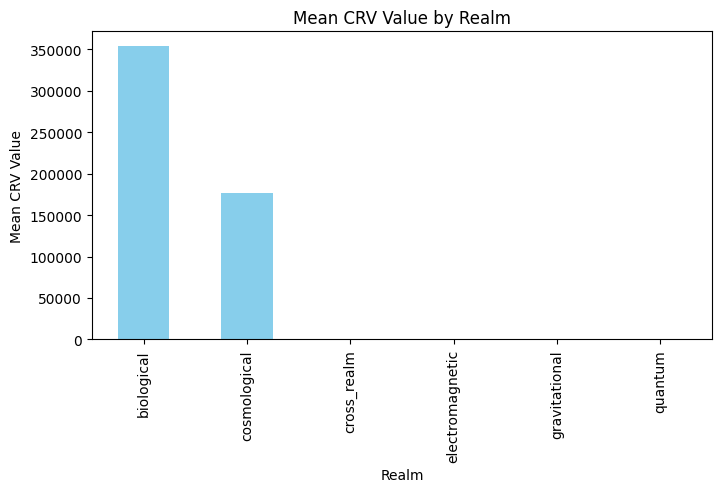

In [81]:
# @title
import matplotlib.pyplot as plt
realm_crvs = catalog.df.groupby('Realm')['CRV_Value'].mean()
plt.figure(figsize=(8,4))
realm_crvs.plot(kind='bar', color='skyblue')
plt.ylabel('Mean CRV Value')
plt.title('Mean CRV Value by Realm')
plt.show()

## 6. Editing and Expanding the CRV Catalog
Add new columns or edit values directly in the notebook.

In [97]:
# @title
# Example: Add a new column 'Rune' and set for Node 1
catalog.add_column('Rune', default='')
catalog.set_value(1, 'Rune', 'Psi')
catalog.save()
catalog.get_node(1)

{'Node_ID': 1,
 'Solid': 'tetrahedron',
 'Node_Type': 'vertex',
 'Node_Index': 0,
 'Position_X': 0.347026,
 'Position_Y': 0.25,
 'Position_Z': 0.85,
 'CRV_Name': 'pi',
 'CRV_Value': 3.141593,
 'CRV_Symbol': 'pi',
 'CRV_Type': 'primary_constant',
 'Is_Known_Constant': True,
 'Realm': 'quantum',
 'Wavelength_nm': 300.0,
 'Frequency_Hz': 3142000000000.0,
 'Description': 'Primary mathematical constant pi',
 'Rune': 'Psi'}

## 7. Integration: Use CRV and HGR Together
Generate a new geometric node, compute CRV/stability, assign frequency, and add to catalog.

In [98]:
# @title
# Make a new node from a torus generator
new_pt = generate_torus_points(1)[0]
new_crv = HGR.crv_from_geometry('torus', new_pt)
new_stab = HGR.calculate_stability(new_crv)
new_freq = HGR.assign_frequency(new_crv, 'electromagnetic')

# Add to catalog (as a dict)
new_node = {
    'Node_ID': catalog.df['Node_ID'].max()+1,
    'Solid': 'torus',
    'Node_Type': 'vertex',
    'Node_Index': 0,
    'Position_X': new_pt[0],
    'Position_Y': new_pt[1],
    'Position_Z': new_pt[2],
    'CRV_Name': 'TorusCRV',
    'CRV_Value': new_crv,
    'CRV_Symbol': '',
    'CRV_Type': 'generated',
    'Is_Known_Constant': False,
    'Realm': 'electromagnetic',
    'Wavelength_nm': '',
    'Frequency_Hz': new_freq,
    'Description': 'Generated from notebook',
    'Rune': ''
}
# Append to the DataFrame and save
catalog.df = pd.concat([catalog.df, pd.DataFrame([new_node])], ignore_index=True)
catalog.save()
catalog.df.tail(1)

,Node_ID,Solid,Node_Type,Node_Index,Position_X,Position_Y,Position_Z,CRV_Name,CRV_Value,CRV_Symbol,CRV_Type,Is_Known_Constant,Realm,Wavelength_nm,Frequency_Hz,Description,Rune
194,195,torus,vertex,0,1.3,0.0,0.0,TorusCRV,1.343,,generated,False,electromagnetic,,1.343000e+14,Generated from notebook,


## 8. Save and Download Results
All changes are saved to your local CSV. You can download or commit your results.

In [84]:
# @title
# To download from Colab, uncomment:
# from google.colab import files
# files.download('data/crv_catalog.csv')

## 9. Basic Notebook initilized
- expanded system starts below

### 2. Develop Module Discovery Mechanism

Now that we know the repository structure, we can add code to dynamically discover Python modules within the `python` directory and its subdirectories.

In [102]:
# @title
import os
import importlib.util
import sys

def find_modules(base_dir="python"):
    """
    Finds all Python files (potential modules) within a given base directory
    and its subdirectories, excluding __init__.py files.
    """
    module_paths = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".py") and file != "__init__.py":
                # Create a module path relative to the base directory
                relative_path = os.path.relpath(os.path.join(root, file), base_dir)
                # Convert file path to a module name (e.g., crv/analysis.py -> crv.analysis)
                module_name = relative_path.replace(os.sep, ".")[:-3] # Remove .py
                module_paths.append((module_name, os.path.join(root, file)))
    return module_paths

# Example usage: Find all potential modules in the 'python' directory
discovered_modules = find_modules()
print("Discovered potential modules:")
for name, path in discovered_modules:
    print(f"- {name} at {path}")

Discovered potential modules:
- bitfield_monad at python/bitfield_monad.py
- glr_corrector at python/glr_corrector.py
- monad_config at python/monad_config.py
- tgic_engine at python/tgic_engine.py
- nrci at python/nrci.py
- crv.mapping at python/crv/mapping.py
- crv.loader at python/crv/loader.py
- crv.analysis at python/crv/analysis.py
- crv.node at python/crv/node.py
- noise.analysis at python/noise/analysis.py
- noise.core at python/noise/core.py
- glr.cubic at python/glr/cubic.py
- glr.utils at python/glr/utils.py
- glr.diamond at python/glr/diamond.py
- glr.h4 at python/glr/h4.py
- glr.base at python/glr/base.py
- glr.temporal at python/glr/temporal.py
- glr.fcc at python/glr/fcc.py
- hgr.generators at python/hgr/generators.py
- hgr.core at python/hgr/core.py
- hexdictionary.hex_dictionary at python/hexdictionary/hex_dictionary.py


### 3. Implement Dynamic Module Loading

Now that we can find the Python files, we need to dynamically import them so their contents are available in the notebook's environment.

In [103]:
# @title
import importlib

loaded_modules = {}
print("Attempting to dynamically load modules:")

for module_name, module_path in discovered_modules:
    try:
        # Use importlib to load the module
        spec = importlib.util.spec_from_file_location(module_name, module_path)
        module = importlib.util.module_from_spec(spec)
        sys.modules[module_name] = module
        spec.loader.exec_module(module)
        loaded_modules[module_name] = module
        print(f"- Successfully loaded module: {module_name}")
    except Exception as e:
        print(f"- Failed to load module {module_name}: {e}")

print("\nAvailable dynamically loaded modules:")
for name in loaded_modules.keys():
    print(f"- {name}")

# Example: Accessing something from a loaded module (replace with an actual function/class)
# try:
#     if 'crv.analysis' in loaded_modules:
#         # Assuming crv.analysis has a function like 'analyze_data'
#         # loaded_modules['crv.analysis'].analyze_data(catalog.df)
#         print("\nAccessing crv.analysis module...")
#         # Example of accessing a function - you would replace this with actual usage
#         # For now, just demonstrating access
#         if hasattr(loaded_modules['crv.analysis'], 'realm_distribution'):
#              print("Can access realm_distribution function from crv.analysis")

# except Exception as e:
#     print(f"Could not access example from loaded module: {e}")

Attempting to dynamically load modules:
- Failed to load module bitfield_monad: attempted relative import with no known parent package
- Successfully loaded module: glr_corrector
- Successfully loaded module: monad_config
- Successfully loaded module: tgic_engine
- Successfully loaded module: nrci
- Successfully loaded module: crv.mapping
- Successfully loaded module: crv.loader
- Successfully loaded module: crv.analysis
- Successfully loaded module: crv.node
- Successfully loaded module: noise.analysis
- Failed to load module noise.core: cannot import name 'glr_error' from 'python.glr.base' (/content/ubp-framework/ubp-framework/python/glr/base.py)
- Successfully loaded module: glr.cubic
- Successfully loaded module: glr.utils
- Successfully loaded module: glr.diamond
- Successfully loaded module: glr.h4
- Successfully loaded module: glr.base
- Successfully loaded module: glr.temporal
- Successfully loaded module: glr.fcc
- Successfully loaded module: hgr.generators
- Successfully load

### 4. Build an Access Layer

To make it easier to interact with the dynamically loaded modules, we can create a simple access layer. This will allow you to easily see which modules and their contents are available.

In [87]:
# @title
class RepositoryWorkbench:
    """
    A simple class to provide access to dynamically loaded modules.
    """
    def __init__(self, loaded_modules):
        self._loaded_modules = loaded_modules

    def list_modules(self):
        """Lists the names of all successfully loaded modules."""
        print("Successfully loaded modules:")
        for name in self._loaded_modules.keys():
            print(f"- {name}")

    def get_module(self, module_name):
        """Returns a specific loaded module by name."""
        return self._loaded_modules.get(module_name)

    def list_contents(self, module_name):
        """Lists the callable contents (functions, classes) of a loaded module."""
        module = self.get_module(module_name)
        if module:
            print(f"Contents of module '{module_name}':")
            for item_name in dir(module):
                # Exclude built-in and private items
                if not item_name.startswith('_'):
                    item = getattr(module, item_name)
                    if callable(item):
                        print(f"- {item_name} ({type(item).__name__})")
        else:
            print(f"Module '{module_name}' not found or failed to load.")

# Create an instance of the workbench
workbench = RepositoryWorkbench(loaded_modules)

# Example usage:
print("\nUsing the workbench:")
workbench.list_modules()

# Example of listing contents of a specific module (replace 'crv.analysis' with a loaded module name)
# workbench.list_contents('crv.analysis')

# Example of getting a module and using a function (replace with actual module and function)
# try:
#     crv_analysis_module = workbench.get_module('crv.analysis')
#     if crv_analysis_module and hasattr(crv_analysis_module, 'realm_distribution'):
#          print("\nAccessing realm_distribution via workbench:")
#          # Assuming realm_distribution can accept the catalog.df
#          # crv_analysis_module.realm_distribution(catalog.df)
# except Exception as e:
#      print(f"Error accessing module or function via workbench: {e}")


Using the workbench:
Successfully loaded modules:
- glr_corrector
- monad_config
- tgic_engine
- nrci
- crv.mapping
- crv.loader
- crv.analysis
- crv.node
- noise.analysis
- glr.cubic
- glr.utils
- glr.diamond
- glr.h4
- glr.base
- glr.temporal
- glr.fcc
- hgr.generators
- hgr.core
- hexdictionary.hex_dictionary


### 5. Create Helper Functions/Macros

To make interacting with the dynamically loaded modules even more convenient, we can create helper functions or utilize IPython features to easily list available modules and their contents.

In [88]:
# @title
def list_available_modules():
    """Lists the names of all successfully loaded modules using the workbench."""
    print("Available modules in the workbench:")
    workbench.list_modules()

def list_module_contents(module_name):
    """Lists the callable contents of a specific loaded module using the workbench."""
    workbench.list_contents(module_name)

def get_repo_module(module_name):
    """Returns a specific loaded module by name using the workbench."""
    return workbench.get_module(module_name)

# Example usage:
print("Trying out helper functions:")
list_available_modules()

# Uncomment to list contents of a specific module
# list_module_contents('crv.analysis')

# Uncomment to get a module and use it
# crv_analysis = get_repo_module('crv.analysis')
# if crv_analysis:
#     print("\nSuccessfully retrieved crv.analysis module.")
    # Example of using a function from the retrieved module (replace with actual usage)
    # if hasattr(crv_analysis, 'realm_distribution'):
    #     print("Can access realm_distribution via helper function.")

Trying out helper functions:
Available modules in the workbench:
Successfully loaded modules:
- glr_corrector
- monad_config
- tgic_engine
- nrci
- crv.mapping
- crv.loader
- crv.analysis
- crv.node
- noise.analysis
- glr.cubic
- glr.utils
- glr.diamond
- glr.h4
- glr.base
- glr.temporal
- glr.fcc
- hgr.generators
- hgr.core
- hexdictionary.hex_dictionary


In [89]:
# @title
# Modify the bitfield_monad.py file to use absolute imports
!sed -i 's/from .monad_config import MonadConfig/from monad_config import MonadConfig/' python/bitfield_monad.py
!sed -i 's/from .tgic_engine import TGICEngine/from tgic_engine import TGICEngine/' python/bitfield_monad.py
print("Updated imports in python/bitfield_monad.py")

Updated imports in python/bitfield_monad.py


In [99]:
# Display the content of python/noise/core.py to verify the change
!cat python/noise/core.py

import numpy as np
from python.nrci import compute_nrci  # NRCI from your repo
from python.glr.base import glr_error  # GLR base error metric

class NoiseSignal:
    """
    UBP NoiseSignal: Handles generation, loading, and analysis of noise signals.
    Integrates NRCI and GLR metrics via your repo modules.
    """

    def __init__(self, data: np.ndarray, samplerate: float = 1.0, label: str = "unknown"):
        self.data = np.asarray(data)
        self.samplerate = samplerate
        self.label = label

    @classmethod
    def synthetic_thermal(cls, length, resistance=1.0, temperature=300.0, samplerate=1.0, rng=None):
        k = 1.380649e-23  # Boltzmann constant
        if rng is None:
            rng = np.random.default_rng()
        power = 4 * k * temperature * resistance * samplerate
        noise = rng.normal(0, np.sqrt(power), length)
        return cls(noise, samplerate=samplerate, label="Synthetic Thermal")

    def to_bitfield(self, threshold=None):
        if threshold 

In [100]:
# @title
# Modify python/noise/core.py using Python file handling
file_path = 'python/noise/core.py'
old_line = 'from python.nrci import compute_nrci'
new_line = 'from python.nrci import calculate_nrci'

try:
    with open(file_path, 'r') as f:
        lines = f.readlines()

    with open(file_path, 'w') as f:
        for line in lines:
            if old_line in line:
                f.write(line.replace(old_line, new_line))
            else:
                f.write(line)
    print(f"Successfully updated import in {file_path}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred while modifying the file: {e}")

Successfully updated import in python/noise/core.py


In [105]:
from hexdictionary.hex_dictionary import HexDictionary

# Initialize (paths are optional, defaults provided)
hex_dict = HexDictionary()

# Add words
hex_dict.add_word("and", binary="001011", definition="A conjunction used to connect words.")
hex_dict.add_word("the", binary="000000", definition="Definite article.")

# List, search, edit, delete
print(hex_dict.list_words())
print(hex_dict.read_word("and"))
hex_dict.edit_word("and", new_binary="110000")
hex_dict.delete_word("the")

# Export/import CSV
hex_dict.export_dictionary("output.csv")
hex_dict.import_dictionary("input.csv")

# Get stats
stats = hex_dict.get_dictionary_stats()
print(stats)

['and', 'the']
{'center': 'and', 'definition': 'A conjunction used to connect words.', 'vertices': [{'id': 1, 'type': 'binary', 'value': [0, 0, 1, 0, 1, 1]}, {'id': 2, 'type': 'qr', 'value': '3x3_hex_3lit'}, {'id': 3, 'type': 'fib_zipf', 'value': 2}, {'id': 4, 'type': 'spatial', 'value': [88, 82, 95.8265499475634, 3.4, 0.1, 1]}, {'id': 5, 'type': 'freq', 'value': [7.83, 0.1]}, {'id': 6, 'type': 'glr', 'value': 'validated'}, {'id': 7, 'type': 'tgic', 'value': 'AND'}, {'id': 8, 'type': 'cultural', 'value': [0.2, 0.0]}, {'id': 9, 'type': 'bittime', 'value': [0.318309886, 0.0]}, {'id': 10, 'type': 'harmonic', 'value': [3, 0.0]}, {'id': 11, 'type': 'waveform', 'value': ['sine', 0.0]}, {'id': 12, 'type': 'amplitude', 'value': [0.5, 0.0]}], 'validation': ['Valid', 'Valid', 'Valid', 'Warning: Spatial drift 11.697614447701929', 'Valid', 'Valid', 'Valid', 'Valid', 'Valid', 'Valid', 'Valid', 'Valid']}
{'total_words': 1, 'avg_frequency': np.float64(7.83), 'avg_toggle_count': np.float64(2.0), 'avg_

In [108]:
# Load the English dictionary CSV into the hex_dict using the provided logic

import pandas as pd
import os
from tqdm import tqdm  # For progress bar

def import_large_dictionary_to_hexdict(hex_dict_instance, csv_path, batch_size=1000):
    """
    Import a dictionary database from a CSV file into a HexDictionary instance.

    Parameters:
    - hex_dict_instance: The HexDictionary object to import data into.
    - csv_path (str): Path to the CSV file (e.g., '/english_dictionary.csv')
    - batch_size (int): Number of words to process per batch for memory efficiency

    Returns:
    - str: Summary of import results (e.g., number of words added, skipped)
    """
    if not os.path.exists(csv_path):
        return f"Error: CSV file not found at {csv_path}"

    try:
        # Read CSV with specified columns
        # Assuming the CSV has 'word', 'pos', 'def' columns based on example
        df = pd.read_csv(csv_path, names=['word', 'pos', 'def'],
                        dtype={'word': str, 'pos': str, 'def': str},
                        na_values=[''], keep_default_na=False, header=0) # Assuming header row

        # Initialize counters
        added = 0
        skipped = 0
        errors = []

        # Process in batches for efficiency
        total_rows = len(df)
        print(f"Processing {total_rows} dictionary entries from {csv_path}...")

        # Ensure HexDictionary has 'definition' and 'binary' columns if needed by add_word
        # Assuming add_word handles adding these columns if they don't exist or
        # that the HexDictionary class already supports them.
        # If add_word requires specific arguments for binary/definition,
        # the logic below might need adjustment based on HexDictionary's add_word signature.

        for start in tqdm(range(0, total_rows, batch_size), desc="Importing words"):
            batch = df[start:start + batch_size]

            for index, row in batch.iterrows():
                word = str(row.get('word', '')).lower().strip() # Use .get for safety
                definition = str(row.get('def', '')).strip()    # Use .get for safety
                pos = str(row.get('pos', '')).strip()          # Use .get for safety

                if word: # Ensure word is not empty
                    try:
                        # Assuming HexDictionary.add_word(word, binary=None, definition=None)
                        # The 'binary' value is not available in this CSV, so we omit it or pass a default
                        # The 'pos' (part of speech) is also not directly mapped in the original HexDictionary structure,
                        # so we'll only add word and definition based on the CSV columns
                        hex_dict_instance.add_word(word, definition=definition)
                        added += 1
                    except OSError as e: # Catch file system errors like Errno 2 and Errno 36
                        errors.append(f"Error adding word '{word}': {e}")
                        skipped += 1
                    except Exception as e: # Catch any other unexpected errors during add_word
                        errors.append(f"Error adding word '{word}': {e}")
                        skipped += 1
                else:
                    skipped += 1 # Skip rows with no word

        summary = f"Import complete. Added {added} words, skipped {skipped} entries."
        if errors:
            summary += f"\nErrors encountered during import:\n" + "\n".join(errors)

        return summary

    except FileNotFoundError:
        return f"Error: CSV file not found at {csv_path}"
    except pd.errors.EmptyDataError:
        return f"Error: CSV file is empty at {csv_path}"
    except Exception as e:
        return f"An unexpected error occurred during import: {e}"


# --- Call the import function ---
csv_file_path = '/english_dictionary.csv'

# Ensure hex_dict object exists from previous cells
if 'hex_dict' in locals():
    print(import_large_dictionary_to_hexdict(hex_dict, csv_file_path))
    print(f"HexDictionary now contains {hex_dict.get_dictionary_stats()['total_words']} words.")
else:
    print("Error: hex_dict object not found. Please run previous cells to initialize HexDictionary.")

# You can optionally display a few words to verify
# print("\nFirst 5 words in the dictionary:")
# for i, word in enumerate(hex_dict.list_words()[:5]):
#     print(f"- {word}")
#     if i >= 4: break

Processing 176048 dictionary entries from /english_dictionary.csv...


Importing words: 100%|██████████| 177/177 [01:22<00:00,  2.15it/s]


Import complete. Added 175985 words, skipped 63 entries.
Errors encountered during import:
Error adding word 'adder fly/': [Errno 2] No such file or directory: 'hexubp_files/adder fly/.hexubp'
Error adding word 'alen/on lace': [Errno 2] No such file or directory: 'hexubp_files/alen/on lace.hexubp'
Error adding word 'assaf/tida': [Errno 2] No such file or directory: 'hexubp_files/assaf/tida.hexubp'
Error adding word 'ballist/': [Errno 2] No such file or directory: 'hexubp_files/ballist/.hexubp'
Error adding word 'basilic/': [Errno 2] No such file or directory: 'hexubp_files/basilic/.hexubp'
Error adding word 'cor/niculate': [Errno 2] No such file or directory: 'hexubp_files/cor/niculate.hexubp'
Error adding word 'cor/niculate': [Errno 2] No such file or directory: 'hexubp_files/cor/niculate.hexubp'
Error adding word 'corni (-n/) di basseto': [Errno 2] No such file or directory: 'hexubp_files/corni (-n/) di basseto.hexubp'
Error adding word 'cr/che': [Errno 2] No such file or directory: 